<a href="https://colab.research.google.com/github/anishgupta02/TheErrors/blob/main/Happy_Sad_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf
import os

In [50]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [51]:
import cv2
import imghdr

In [52]:
data_dir='/content/drive/MyDrive/data'

In [53]:
image_exts=['jpeg','jpg','bmp','png']

In [54]:
os.listdir(data_dir)

['sad', 'happy']

In [55]:
len(os.listdir(os.path.join(data_dir,'happy')))

107

In [56]:
len(os.listdir(os.path.join(data_dir,'sad')))

82

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [59]:
len(os.listdir(os.path.join(data_dir,'happy')))

107

In [60]:
len(os.listdir(os.path.join(data_dir,'sad')))

82

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 189 files belonging to 2 classes.


In [64]:
data_iterator=data.as_numpy_iterator()

In [65]:
#Get another batch from the iterator
batch=data_iterator.next()

In [66]:
len(batch)

2

In [67]:
#image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [68]:
batch[1]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

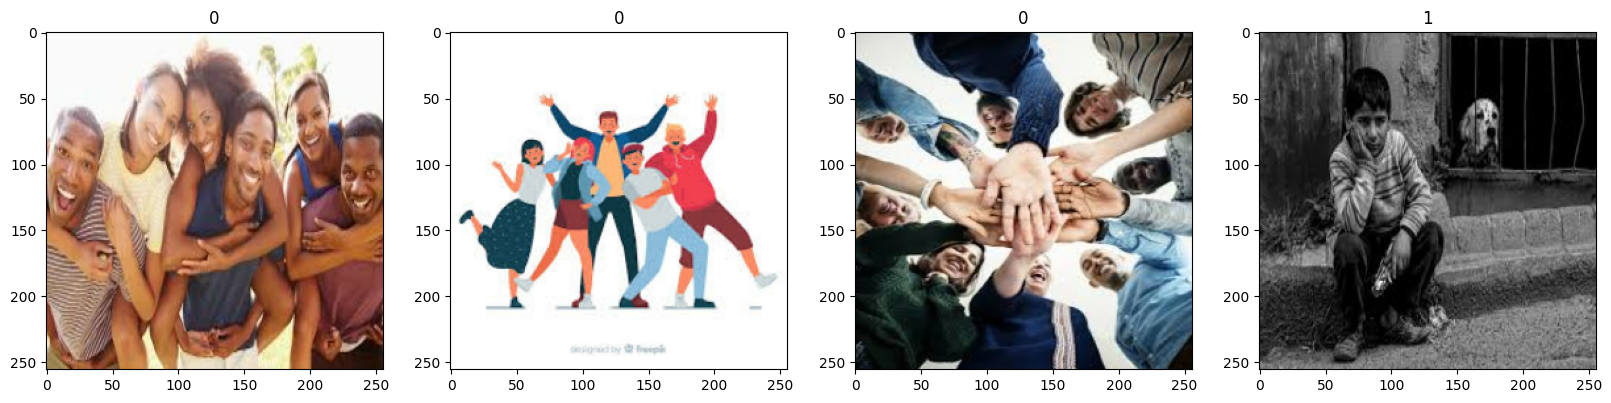

In [69]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


In [70]:
#class=1 is sad people
#class=0 is sad people

In [71]:
batch[1].shape

(32,)

Preprocess data

In [72]:
data=data.map(lambda x,y:(x/255,y)) #scalling

In [73]:
scaled_iterator=data.as_numpy_iterator()

In [74]:
batch=scaled_iterator.next()

In [75]:
scaled_iterator.next()[0].max()

1.0

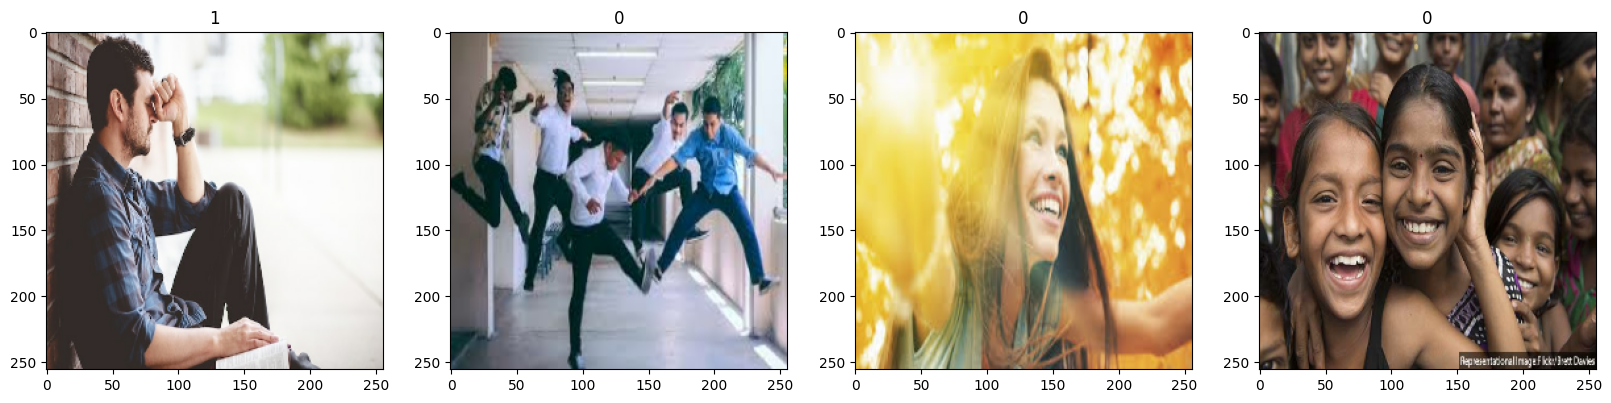

In [76]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

SPLIT DATA

In [77]:
len(data)

6

In [78]:
total_size = len(data)
train_size = int(total_size * 0.7)
val_size = int(total_size * 0.2)
test_size = total_size - train_size - val_size

train_size,val_size,test_size

(4, 1, 1)

In [79]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

MODEL BUILDING

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [81]:
model=Sequential()

In [82]:
model.add(Conv2D(16,(3,3),1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation='sigmoid'))


In [83]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [85]:
hist=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
4/4 [==============================] - 17s 3s/step - loss: 1.8387 - accuracy: 0.5234 - val_loss: 1.8544 - val_accuracy: 0.3125
Epoch 2/20
4/4 [==============================] - 17s 4s/step - loss: 0.8992 - accuracy: 0.5469 - val_loss: 0.6451 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 17s 3s/step - loss: 0.6331 - accuracy: 0.6016 - val_loss: 0.6088 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 21s 5s/step - loss: 0.6664 - accuracy: 0.6016 - val_loss: 0.6513 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 17s 4s/step - loss: 0.6457 - accuracy: 0.7578 - val_loss: 0.6182 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 17s 3s/step - loss: 0.6282 - accuracy: 0.5547 - val_loss: 0.6167 - val_accuracy: 0.5312
Epoch 7/20
4/4 [==============================] - 17s 4s/step - loss: 0.5371 - accuracy: 0.7422 - val_loss: 0.4949 - val_accuracy: 0.9062
Epoch 8/20
4/4 [==================

In [86]:
hist.history

{'loss': [1.8387060165405273,
  0.8992382884025574,
  0.6331367492675781,
  0.6664340496063232,
  0.6456621885299683,
  0.6281506419181824,
  0.5370633006095886,
  0.5139211416244507,
  0.43152347207069397,
  0.3698883056640625,
  0.3729848861694336,
  0.2732473909854889,
  0.23677101731300354,
  0.2498968243598938,
  0.19756102561950684,
  0.1585468053817749,
  0.14392371475696564,
  0.10320625454187393,
  0.07557494938373566,
  0.041952695697546005],
 'accuracy': [0.5234375,
  0.546875,
  0.6015625,
  0.6015625,
  0.7578125,
  0.5546875,
  0.7421875,
  0.765625,
  0.8671875,
  0.84375,
  0.84375,
  0.9453125,
  0.9453125,
  0.90625,
  0.921875,
  0.9609375,
  0.96875,
  0.9765625,
  0.9921875,
  0.9921875],
 'val_loss': [1.8543939590454102,
  0.6451071500778198,
  0.6088107824325562,
  0.6512634754180908,
  0.6181963682174683,
  0.616736114025116,
  0.49487224221229553,
  0.40054965019226074,
  0.3211619555950165,
  0.4732022285461426,
  0.2899157404899597,
  0.2640947699546814,
  0.

PERFORMANCE PLOTTING


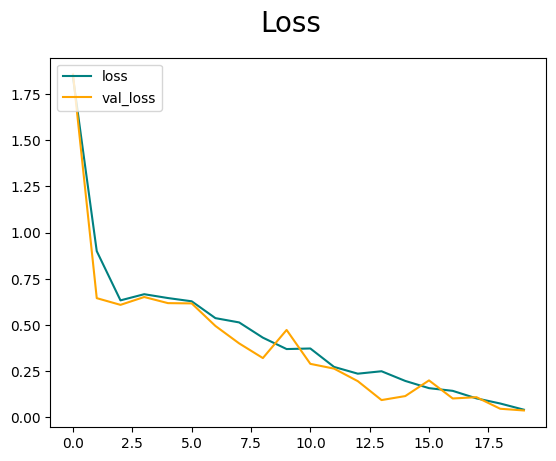

In [87]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

EVALUATE PERFORMANCE

In [89]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [90]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 622ms/step


In [91]:
print(f'precision:{pre.result().numpy()},recall:{re.result().numpy()},accuracy:{acc.result().numpy()}')

precision:1.0,recall:1.0,accuracy:1.0


In [92]:
import cv2

In [93]:
img=cv2.imread('test_image_path')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [86]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
np.expand_dims(resize,0)

In [86]:
yhat=model.predictr(np.expand_dims(resize/255,0))

In [86]:
yhat

In [86]:
if yhat>0.5:
  print(f'Sad')
else:
  print('Happy')